In [6]:
# Esto requiere cargar manualmente el archivo de orders

# If this is going to be running in Colab, the file orders.csv should be uploaded the colab notebook.

In [7]:
import requests
import json
import pandas as pd
import datetime
import time
import random

In [8]:
import numpy as np
import re
import datetime as dt # Ojo con esto
import pytz
import os
import matplotlib.pyplot as plt

In [9]:
def fnConvierteFechaStrToDate(df,columna):
  df[columna] = pd.to_datetime(df[columna].str[:10],format='%Y-%m-%d')

In [10]:
# Lectura

data_orders = pd.read_csv("orders.csv")

In [11]:
data_orders.shape

(687, 23)

In [12]:
# Entendimiento de los datos

data_orders.head()

,id,sell_order_state_id,sell_order_state_name,assigned_warehouse_id,assigned_warehouse_name,creation_date,creation_date2,creation_date3,delivered_date,picked_up_date,...,delivery_promise_max2,delivery_promise_max3,pack_promise_max,pack_promise_max2,pack_promise_max3,closed_date,closed_date2,closed_date3,sell_order_id,sell_order_id_with_issue
0,16835630668861,6,Picked-up by buyer,2,Medellin #1,2023-05-08 16:24:27,202305,2023-05-08,NaN,2023-05-08 17:16:00,...,NaN,NaN,2023-05-09 15:00:00,202305.0,2023-05-09,2023-05-08 17:16:54,202305.0,2023-05-08,NaN,NaN
1,16872317236343,6,Picked-up by buyer,2,Medellin #1,2023-06-20 03:28:44,202306,2023-06-20,NaN,2023-06-20 05:26:24,...,NaN,NaN,2023-06-20 15:00:00,202306.0,2023-06-20,2023-06-20 05:26:28,202306.0,2023-06-20,NaN,NaN
2,16874503080924,6,Picked-up by buyer,1,Bogota #1,2023-06-22 16:11:48,202306,2023-06-22,NaN,2024-01-02 20:19:00,...,NaN,NaN,2023-06-22 17:11:48,202306.0,2023-06-22,2024-01-02 20:19:55,202401.0,2024-01-02,NaN,NaN
3,167880619306380,6,Picked-up by buyer,1,Bogota #1,2023-03-14 15:03:13,202303,2023-03-14,NaN,2023-04-27 20:27:00,...,NaN,NaN,2023-03-15 15:00:00,202303.0,2023-03-15,2023-04-27 20:27:29,202304.0,2023-04-27,NaN,NaN
4,167880619588082,6,Picked-up by buyer,1,Bogota #1,2023-03-14 15:03:16,202303,2023-03-14,NaN,2023-04-27 20:30:00,...,NaN,NaN,2023-03-14 17:03:16,202303.0,2023-03-14,2023-04-27 20:30:13,202304.0,2023-04-27,NaN,NaN


In [13]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        687 non-null    int64  
 1   sell_order_state_id       687 non-null    int64  
 2   sell_order_state_name     687 non-null    object 
 3   assigned_warehouse_id     687 non-null    int64  
 4   assigned_warehouse_name   687 non-null    object 
 5   creation_date             687 non-null    object 
 6   creation_date2            687 non-null    int64  
 7   creation_date3            687 non-null    object 
 8   delivered_date            317 non-null    object 
 9   picked_up_date            69 non-null     object 
 10  picked_up_date2           69 non-null     float64
 11  picked_up_date3           69 non-null     object 
 12  delivery_promise_max      571 non-null    object 
 13  delivery_promise_max2     571 non-null    float64
 14  delivery_p

In [14]:
fnConvierteFechaStrToDate(data_orders,'creation_date')

In [15]:
fnConvierteFechaStrToDate(data_orders,'closed_date')

In [16]:
# Agregar las semanas

data_orders['closed_date_YrWeek'] = data_orders['closed_date'].dt.strftime('%Y-%W')

In [17]:
data_orders.groupby(['closed_date_YrWeek']).count()[['id']]

,id
closed_date_YrWeek,
2023-10,9
2023-11,13
2023-13,19
2023-14,3
2023-15,13
2023-16,14
2023-17,5
2023-18,17
2023-19,39


In [18]:
df_1 = data_orders.groupby(['closed_date_YrWeek']).count()[['id']]

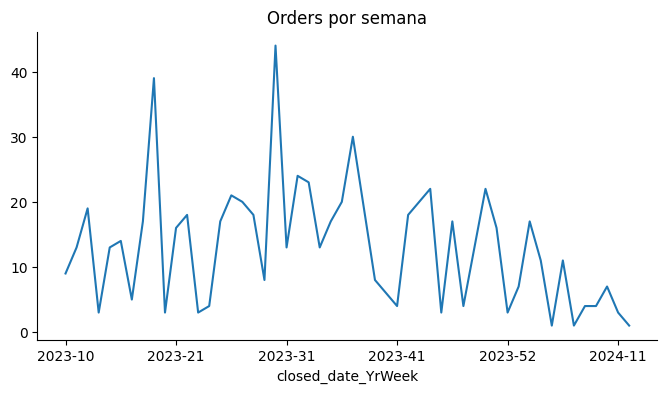

In [19]:
from matplotlib import pyplot as plt
df_1['id'].plot(kind='line', figsize=(8, 4), title='Orders por semana')
plt.gca().spines[['top', 'right']].set_visible(False)

In [20]:
datos = data_orders.groupby(['closed_date_YrWeek']).count()[['id']]

In [21]:
datos.shape

(52, 1)

In [22]:
# ahora con reset index

datos2 = datos.reset_index()

In [23]:
datos = datos2.copy()

In [24]:
# Definir la cantidad de datos para Train y Test

steps = 8
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

Datos train : 0 --- 43  (n=44)
Datos test  : 44 --- 51  (n=8)


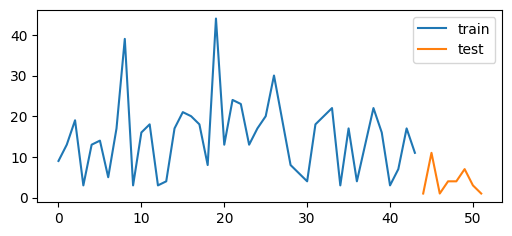

In [25]:
# Hacer el split de los datos

steps = 8
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

print(f"Datos train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Datos test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['id'].plot(ax=ax, label='train')
datos_test['id'].plot(ax=ax, label='test')
ax.legend();

In [26]:
datos_test

,closed_date_YrWeek,id
44,2024-04,1
45,2024-06,11
46,2024-07,1
47,2024-08,4
48,2024-09,4
49,2024-10,7
50,2024-11,3
51,2024-12,1


In [27]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.4 MB/s eta 0:00:00


In [28]:
from skforecast.datasets import fetch_dataset
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar un modelo: forecaster

forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train['id'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 43] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-03-22 23:21:03 
Last fit date: 2024-03-22 23:21:03 
Skforecast version: 0.11.0 
Python version: 3.10.12 
Forecaster id: None 

In [29]:
# Predecir (los steps que luego se van a comparar con los de Test)

steps = 8
predicciones = forecaster.predict(steps=steps)
predicciones.head(8)

44    19.40
45    15.49
46     7.32
47    11.80
48    12.79
49    12.55
50    24.21
51    15.39
Name: pred, dtype: float64

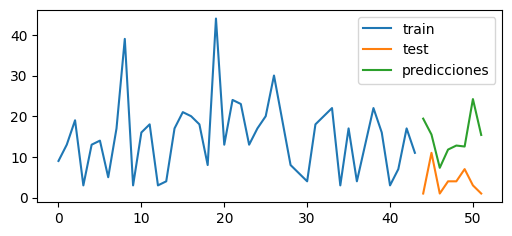

In [30]:
# Gráfico de predicciones vs valores reales (para hacer Test)

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['id'].plot(ax=ax, label='train')
datos_test['id'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [31]:
# Error con los datos de test

from sklearn.metrics import mean_squared_error

error_mse = mean_squared_error(
                y_true = datos_test['id'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 153.0631625


In [32]:
# Búsqueda de hiperparámetros (para mejorar performance del modelo)

from skforecast.model_selection import grid_search_forecaster

steps = 8
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # Este valor será remplazado en el grid search
             )

# Valores candidatos de lags
lags_grid = [10, 20]

# Valores candidatos de hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 15]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train['id'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        n_jobs             = 'auto',
                        verbose            = False
                  )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 77.09803000000001



In [33]:
# Resultados de la búsqueda de hiperparámetros

resultados_grid

,lags,params,mean_squared_error,max_depth,n_estimators
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",77.098030,3,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",77.098030,5,500
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 15, 'n_estimators': 500}",77.098030,15,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",80.507150,3,100
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",80.507150,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 15, 'n_estimators': 100}",80.507150,15,100
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 15, 'n_estimators': 500}",94.130139,15,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",94.145573,5,500
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 100}",95.579986,3,100
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 3, 'n_estimators': 500}",96.131066,3,500


In [34]:
# Crear y entrenar forecaster con mejores hiperparámetros

regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=datos_train['id'])

In [35]:
# Predicciones con el modelo ya mejorado en hiperparámetros

predicciones = forecaster.predict(steps=steps)

In [36]:
predicciones

44    17.478050
45    14.430143
46    13.232122
47    11.828642
48    12.409175
49    17.700120
50    15.405502
51    15.676308
Name: pred, dtype: float64

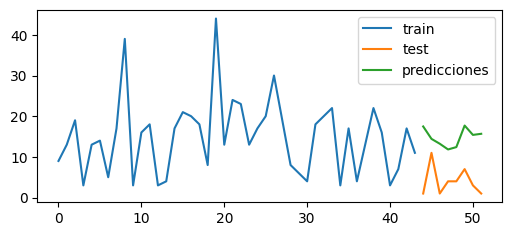

In [37]:
# Gráfico de predicciones vs valores reales

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['id'].plot(ax=ax, label='train')
datos_test['id'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

In [38]:
# Error de test

error_mse = mean_squared_error(
                y_true = datos_test['id'],
                y_pred = predicciones
            )

print(f"Error de test (mse) {error_mse}")

Error de test (mse) 131.0877187890813


In [39]:
# Ahora se va a utilizar el modelo con los mejores hiperparámetros para predecir datos fuera de la muestra

# Crear y entrenar forecaster con mejores hiperparámetros. Se usa el dataset completo para entrenar el modelo.

regressor = RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=datos['id'])

In [40]:
# Predicciones

predicciones = forecaster.predict(steps=steps)

In [41]:
predicciones

52    5.497497
53    6.825356
54    5.792917
55    6.109773
56    6.017773
57    6.087348
58    6.410113
59    7.072880
Name: pred, dtype: float64

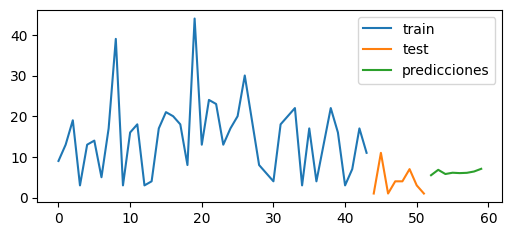

In [42]:
# Gráfico de predicciones

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['id'].plot(ax=ax, label='train')
datos_test['id'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();